# 📊 İstatistikte Hipotez Testi (Python ile)

Python kullanarak istatistiksel hipotez testi hakkında bu kapsamlı not defterine hoş geldiniz. Temel kavramları keşfedecek ve pratik örnekler ve gerçek dünya senaryolarıyla istatistiksel testler gerçekleştireceğiz.

## 📌 1. Hipotez Testine Giriş

### 🎯 Amaç:
Bir popülasyon parametresi (ortalama gibi) hakkındaki bir hipotezin örnek verilere göre istatistiksel olarak anlamlı olup olmadığını belirlemek.

### 🔍 Temel Kavramlar:
- **Sıfır Hipotezi (H₀)**: Hiçbir etki veya fark olmadığını varsayar.
- **Alternatif Hipotez (H₁)**: Kanıtlamak istediğimiz şey—bir etki veya fark olduğunu gösterir.
- **Önem Düzeyi (α)**: H₀'yi reddetmek için eşik olasılığıdır. 
- **p-değeri**: H₀'nin doğru olduğu varsayılarak, en azından gözlemlenen kadar uç bir sonuç elde etme olasılığıdır.

### 🧪 İstatistiksel Hipotez Testi Adımları

### 🎯 Hipotezlerin Kurulması (İddia → Bilimsel Formül)

- **H₀ (Sıfır Hipotezi):** "Değişim yok" iddiası  
  Örnek: İlacın etkisiz olduğu  
  **H₀: μ = 0**

- **H₁ (Alternatif Hipotez):** "Değişim var" iddiası  
  Örnek: İlacın etkili olduğu  
  **H₁: μ > 0**

💡 **Not:** Araştırmacının savunduğu iddia **H₁**’dir. Amaç **H₀’ı çürütmektir**.


### 📏 Test İstatistiği (Veriyi Sayıya Dönüştürme)

**Amaç:** Örnek verinin H₀'a ne kadar uyduğunu veya uymadığını ölçmek.

Formül, kullanılan test türüne göre değişir:

- Ortalamalar için: **z-testi / t-testi**
- Oranlar için: **z-testi**
- Varyanslar için: **χ² (Ki-kare testi)**

###  📉 p-değeri (İstatistiğin Uçluluğu)

**Tanım:** H₀ doğru kabul edilirse, elde edilen test istatistiği veya daha uç bir değerin görülme olasılığıdır.

#### Hesaplama Yöntemleri:

- z-istatistiği → Standart normal dağılım tablosu / yazılım
- t-istatistiği → t-dağılımı tablosu / yazılım

#### Örnek:

- z = 2.0  
- **p = P(Z ≥ 2.0) = 0.0228** (sağ kuyruk testi)


###  🧾 α (Alfa - Önem Düzeyi)

**Tanım:** H₀'ı reddetmek için kabul edilen maksimum hata (risk) düzeyidir.

#### Yaygın Değerler:

- **α = 0.05** → %5 hata payı  
- **α = 0.01** → %1 hata payı


###  ⚖️ Karar Verme Kuralları

```text
eğer p-değeri < α ise → H₀ reddedilir (istatistiksel olarak anlamlı)
eğer p-değeri ≥ α ise → H₀ reddedilemez (kanıt yetersiz)


## 🚨 2. Tip I ve Tip II Hataları

### ❗ Tip I Hatası (Yanlış Pozitif):
- Gerçek bir sıfır hipotezini reddetmek.
- Örnek: Etkili olmadığı halde bir ilacı etkili ilan etmek.

### ❓ Tip II Hatası (Yanlış Negatif):
- Yanlış bir sıfır hipotezini reddetmemek.
- Örnek: Gerçekten işe yaradığında bir ilacın etkisiz olduğu sonucuna varmak.

| Tip | Açıklama | Sonuç |
|-------------|-----------------------------------|--------------------------------------|
| Tip I (α) | Yanlış alarm | Gereksiz eylem veya maliyet |
| Tip II (β) | Kaçırılan tespit | Kaçırılan fırsat veya risk devam ediyor |

## 🧭 3. Tek Kuyruklu ve İki Kuyruklu Testler

### ▶️ Tek Kuyruklu Test:
Parametrenin bir değerden büyük **veya** küçük olup olmadığını test eder. Yön önemli olduğunda kullanın (örn. H₁: μ > μ₀).

### 🔁 İki Kuyruklu Test:
Parametrenin bir değere **eşit olmadığını** test eder. Herhangi bir sapma önemli olduğunda kullanın (örn. H₁: μ ≠ μ₀).

## 🎯 Senaryo Örneği: Deniz Suyundaki Kurşun Seviyesi

Bir kıyı bölgesindeki kirliliğin kabul edilebilir sınırları aşıp aşmadığını test ediyorsunuz:
- Popülasyon Ortalaması (μ₀) = 10 ppm
- Örnek Ortalaması (x̄) = 10,5 ppm
- Popülasyon SD (σ) = 1,5 ppm
- Örnek Boyutu (n) = 40
- α = 0,05

In [5]:
# Adım Adım (Z Testi: Popülasyon standart sapması biliniyor, n > 30):

import scipy.stats as stats
import numpy as np

mu_0 = 10      # varsayılan popülasyon ortalaması
x_bar = 10.5   # örnek ortalaması
sigma = 1.5    # popülasyon standart sapması
n = 40

z = (x_bar - mu_0) / (sigma / np.sqrt(n))
p_value = 1 - stats.norm.cdf(z)  # sağ kuyruk testi(right-tail test)

print(f"Z Score: {z:.3f}")
print(f"P-Value: {p_value:.4f}")

# ✅ Eğer `p-değeri < α` ise, H₀'yi reddet → Kirlilik önemli ölçüde daha yüksektir.

Z Score: 2.108
P-Value: 0.0175


## 🧪 Tüm Hipotez Testi Yöntemlerini Uygulama

In [10]:
# Bölgeleri simüle et:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
clean = np.random.normal(10, 1.5, 40)
polluted = np.random.normal(10.5, 1.5, 40)
region_c = np.random.normal(11, 1.5, 40)

In [11]:
# ANOVA için Veri Çerçevesi
df = pd.DataFrame({"Region": ["Clean"]*40 + ["Polluted"]*40 + ["Coastal"]*40,
                   "LeadLevel": np.concatenate([clean, polluted, region_c])})

In [8]:
df

,Region,LeadLevel
0,Clean,10.745071
1,Clean,9.792604
2,Clean,10.971533
3,Clean,12.284545
4,Clean,9.648770
...,...,...
115,Coastal,11.452321
116,Coastal,10.947932
117,Coastal,9.246983
118,Coastal,12.714234


### 📊 Kutu Grafikleri ve Dağılımlar

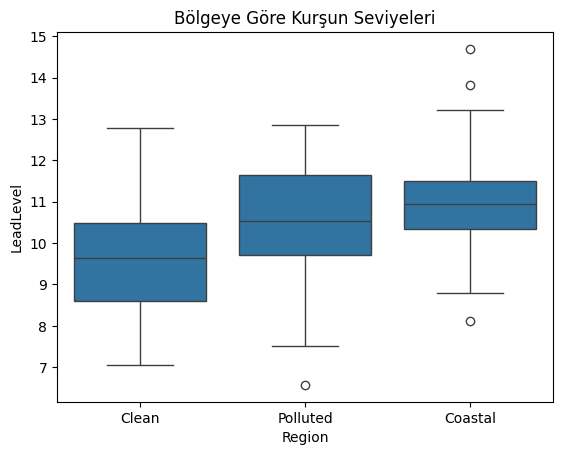

In [9]:
# Görsel karşılaştırma için kutu grafiği
sns.boxplot(x="Region", y="LeadLevel", data=df)
plt.title("Bölgeye Göre Kurşun Seviyeleri")
plt.show()

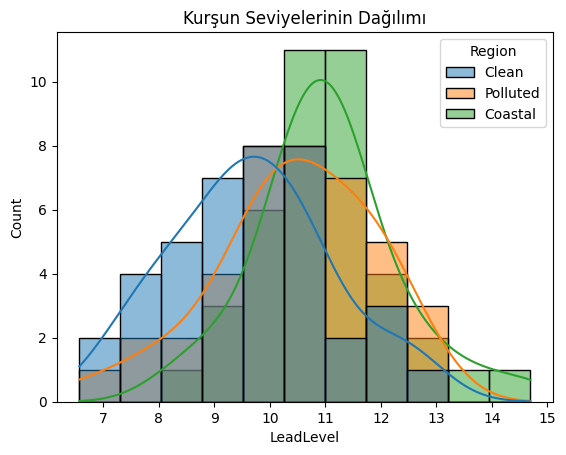

In [12]:
# Histogram ve KDE çizimi
sns.histplot(data=df, x="LeadLevel", hue="Region", kde=True)
plt.title("Kurşun Seviyelerinin Dağılımı")
plt.show()

### 1️⃣ Z-Test

In [13]:
z = (np.mean(polluted) - mu_0) / (sigma / np.sqrt(len(polluted)))
p_val = 1 - stats.norm.cdf(z)
print("Z-Test: Z=", round(z, 3), ", p=", round(p_val, 4))

Z-Test: Z= 1.924 , p= 0.0271


### 2️⃣ Independent T-Test

In [14]:
t_stat, p_val = stats.ttest_ind(clean, polluted)
print("T-Test: T=", round(t_stat, 3), ", p=", round(p_val, 4))

T-Test: T= -2.439 , p= 0.017


### 3️⃣ Paired T-Test (Before/After)

In [15]:
before = np.random.normal(10.5, 1.5, 30)
after = before - np.random.normal(0.5, 0.3, 30)
t_stat, p_val = stats.ttest_rel(before, after)
print("Paired T-Test: T=", round(t_stat, 3), ", p=", round(p_val, 4))

Paired T-Test: T= 11.248 , p= 0.0


### 4️⃣ One-Way ANOVA

In [16]:
f_stat, p_val = stats.f_oneway(clean, polluted, region_c)
print("ANOVA: F=", round(f_stat, 3), ", p=", round(p_val, 4))

ANOVA: F= 9.405 , p= 0.0002


### 5️⃣ Chi-Square Test

In [17]:
obs = np.array([[30, 10], [20, 20]])
chi2, p_val, dof, exp = stats.chi2_contingency(obs)
print("Chi-Square: Chi2=", round(chi2, 3), ", p=", round(p_val, 4))

Chi-Square: Chi2= 4.32 , p= 0.0377


### 📈 Çevre için Rapor Özeti:

- Z-Testi p < 0,05 gösterdi → Kirli bölgedeki kurşun seviyeleri önemli ölçüde daha yüksek.
- ANOVA tüm bölgelerdeki farklılıkları doğruladı.
- Görselleştirme kurşun kirliliğindeki artış eğilimini destekliyor.

## 🧠 Psikoloji Senaryosu: Bilişsel Terapi Etkinliği

Bilişsel terapinin kaygı puanlarını önemli ölçüde azaltıp azaltmadığını test ediyorsunuz.
- Veri: 30 hasta, terapiden önce ve sonra:

In [18]:
before = np.random.normal(25, 5, 30)
after = before - np.random.normal(5, 2, 30)

In [19]:
# Paired T-Test
from scipy.stats import ttest_rel
stat, p = ttest_rel(before, after)
print("Paired T-Test: p=", round(p, 4))

Paired T-Test: p= 0.0


✅ Yorum: Eğer `p < 0,05` ise terapi kaygıyı azaltmada etkilidir.

### 📊 Görselleştirme:

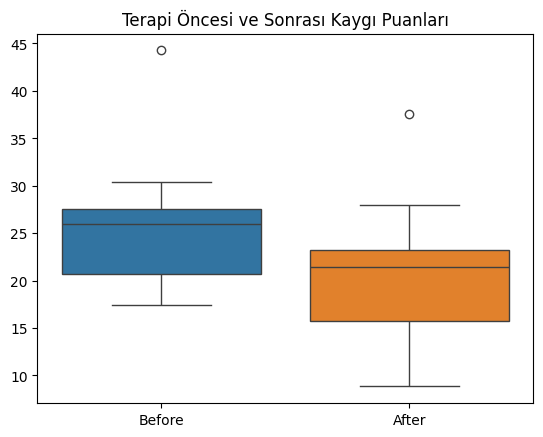

In [20]:
sns.boxplot(data=[before, after])
plt.xticks([0, 1], ['Before', 'After'])
plt.title("Terapi Öncesi ve Sonrası Kaygı Puanları")
plt.show()

### 📈 Terapi için Rapor Özeti:
- Eşleştirilmiş T Testi 0,05'in çok altında bir p değeri verdi.
- Terapi, kaygıyı azaltmada istatistiksel olarak etkili görünüyor.
- Görselleştirme, terapiden sonra puanlarda belirgin bir düşüş olduğunu gösteriyor.

## 📈 Pazarlama Senaryosu: Dönüşüm Oranları A/B Testi

İki web sayfası sürümünü karşılaştırıyorsunuz:
- Sürüm A: 100 kullanıcı, 25 dönüştürülmüş
- Sürüm B: 100 kullanıcı, 35 dönüştürülmüş

In [21]:
obs = np.array([[25, 75], [35, 65]])
chi2, p, dof, exp = stats.chi2_contingency(obs)
print("Chi-Square Test for A/B: p=", round(p, 4))

Chi-Square Test for A/B: p= 0.1649


✅ Yorum: Eğer `p < 0,05` ise, Versiyon B'nin dönüşüm oranı önemli ölçüde daha iyidir.

### 📊 Görselleştirme:

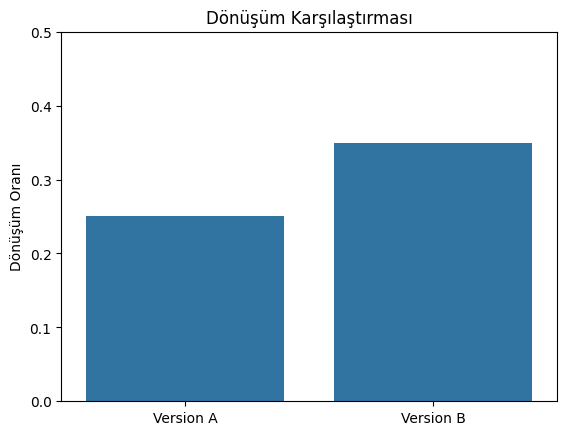

In [23]:
sns.barplot(x=['Version A', 'Version B'], y=[25/100, 35/100])
plt.ylabel("Dönüşüm Oranı")
plt.title("Dönüşüm Karşılaştırması")
plt.ylim(0, 0.5)
plt.show()

## ✅ Parametresiz Alternatifler ve Varsayım Kontrolleri

### 6️⃣ Normallik Kontrolü

In [24]:
from scipy.stats import shapiro

stat, p = shapiro(polluted)
print("Shapiro-Wilk Test: p=", round(p, 4))

Shapiro-Wilk Test: p= 0.3709


### 7️⃣ Varyans Homojenliği (Levene Testi)

In [25]:
from scipy.stats import levene

stat, p = levene(clean, polluted)
print("Levene’s Test: p=", round(p, 4))

Levene’s Test: p= 0.9633


### 8️⃣ Mann-Whitney U Test

In [26]:
from scipy.stats import mannwhitneyu

u, p = mannwhitneyu(clean, polluted)
print("Mann-Whitney U Test: p=", round(p, 4))

Mann-Whitney U Test: p= 0.0112


### 9️⃣ Wilcoxon Signed-Rank Test

In [27]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(before - after)
print("Wilcoxon Test: p=", round(p, 4))

Wilcoxon Test: p= 0.0


### 🔟 Kruskal-Wallis Testi (Parametrik Olmayan ANOVA)

In [28]:
from scipy.stats import kruskal

stat, p = kruskal(clean, polluted, region_c)
print("Kruskal-Wallis Test: p=", round(p, 4))

Kruskal-Wallis Test: p= 0.0002


## 📌 Tüm Testlerin Özeti

| Test | Kullanım Amacı | Varsayımlar |
|----------------------|---------------------------------------------|----------------------------------------|
| Z Testi | Büyük n, bilinen standart sapma | Normallik, bilinen σ |
| Bağımsız T Testi | İki grup ortalaması | Normallik, eşit varyanslar |
| Eşleştirilmiş T Testi | Aynı deneklerde öncesi-sonrası | Farklılıkların normalliği |
| ANOVA | 3+ grup | Normallik, eşit varyanslar |
| Ki-Kare Testi | Kategorik değişkenler | Beklenen frekans > 5 |
| Mann-Whitney | 2 bağımsız grup için parametrik olmayan | Bağımsız, sıralı/sürekli |
| Wilcoxon | Eşleştirilmiş veriler için parametrik olmayan | Fark dağılımının simetrisi |
| Kruskal-Wallis | 3+ grup için parametrik olmayan | Bağımsız örnekler |